CS4001/4042 Assignment 1, Part B, Q1
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
# !pip install pytorch_tabular[extra]

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


> Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
train_data = df[df['year'] <= 2019]
val_data = df[df['year'] == 2020]
test_data = df[df['year'] == 2021]

> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# TODO: Enter your code here
target = ['resale_price']
continuous_cols = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
categorical_cols = ['month', 'town', 'flat_model_type', 'storey_range']

data_config = DataConfig(
    target=target,
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

trainer_config = TrainerConfig(
    batch_size=1024,
    max_epochs=50,
    auto_lr_find=True #auto tune learning rate
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",
    activation="ReLU"
)

optimizer_config = OptimizerConfig() #Pytorch Tabular uses Adam optimizer with a learning rate of 1e-3 by default.

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train_data, validation=val_data)

result = tabular_model.evaluate(test_data)
pred = tabular_model.predict(test_data)



2023-10-13 09:52:35,779 - {pytorch_tabular.tabular_model:105} - INFO - Experiment Tracking is turned off
Global seed set to 42
2023-10-13 09:52:35,818 - {pytorch_tabular.tabular_model:473} - INFO - Preparing the DataLoaders
2023-10-13 09:52:35,823 - {pytorch_tabular.tabular_datamodule:290} - INFO - Setting up the datamodule for regression task
2023-10-13 09:52:35,941 - {pytorch_tabular.tabular_model:521} - INFO - Preparing the Model: CategoryEmbeddingModel
2023-10-13 09:52:35,989 - {pytorch_tabular.tabular_model:268} - INFO - Preparing the Trainer
C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\trainer\connectors\accelerator_connector.py:589: LightningDeprecationWarning: The Trainer argument `auto_select_gpus` has been deprecated in v1.9.0 and will be removed in v2.0.0. Please use the function `pytorch_lightning.accelerators.find_usable_cuda_devices` instead.
  rank_zero_deprecation(
GPU available: False, used: False
TPU available: False, using: 0 TPU co

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\core\module.py:493: UserWarning: You called `self.log('train_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\core\module.py:493: UserWarning: You called `self.log('train_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(
`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at c:\Users\XIANG\OneDrive - Nanyang Technological University\Desktop\NTU\Y4S1\CZ4042 Neural Networks\Assignment 1\.lr_find_d5b2061e-e68b-416c-867a-0fbce0ac58fd.ckpt
Restored all states from the checkpoint file at c:\Users\XIANG\OneDrive - Nanyang Technological University\Desktop\NTU\Y4S1\CZ4042 Neural Ne

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2023-10-13 09:53:36,186 - {pytorch_tabular.tabular_model:584} - INFO - Training the model completed
2023-10-13 09:53:36,188 - {pytorch_tabular.tabular_model:1258} - INFO - Loading the best model


Output()

C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\utilities\cloud_io.py:33: LightningDeprecationWarning: `pytorch_lightning.utilities.cloud_io.get_filesystem` has been deprecated in v1.8.0 and will be removed in v2.0.0. Please use `lightning_fabric.utilities.cloud_io.get_filesystem` instead.
  rank_zero_deprecation(
C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\core\module.py:493: UserWarning: 
You called `self.log('test_loss', ..., logger=True)` but have no logger configured. You can enable one by doing 
`Trainer(logger=ALogger(...))`
  rank_zero_warn(

C:\Users\XIANG\AppData\Roaming\Python\Python310\site-packages\pytorch_lightning\core\module.py:493: UserWarning: 
You called `self.log('test_mean_squared_error', ..., logger=True)` but have no logger configured. You can enable 
one by doing `Trainer(logger=ALogger(...))`
  rank_zero_warn(

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       5882421248.0        │
│  test_mean_squared_error  │       5882421248.0        │
└───────────────────────────┴───────────────────────────┘

Output()

> Report the test RMSE error and the test R2 value that you obtained.



\# TODO: \<Enter your answer here\>

In [5]:
import math
from sklearn.metrics import mean_squared_error, r2_score

target = pred['resale_price']
prediction = pred['resale_price_prediction']

print(f"RMSE: {math.sqrt(mean_squared_error(target, prediction))}")
print(f"R^2: {r2_score(target, prediction)}")

RMSE: 76696.94461008038
R^2: 0.7776186443713626


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [6]:
# TODO: Enter your code here
pred['error'] = (pred['resale_price'] - pred['resale_price_prediction'])**2
worst_predictions = pred.sort_values(by="error", ascending=False).head(25)
best_predictions = pred.sort_values(by="error", ascending=True).head(25)

worst_predictions

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,3.646865e+05,1.724853e+11
90957,6,2021,BUKIT BATOK,288A BUKIT BATOK STREET 25,Bukit Batok,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.144982e+05,1.249635e+11
112128,12,2021,TAMPINES,156 TAMPINES STREET 12,Tampines,0.370873,12.479752,0.033613,0.000229,"EXECUTIVE, Maisonette",61.750000,148.0,01 TO 03,998000.0,6.555936e+05,1.172422e+11
90608,12,2021,BISHAN,273B BISHAN STREET 24,Bishan,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.020589e+06,1.152001e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,6.359388e+05,1.102646e+11
91871,6,2021,BUKIT MERAH,17 TIONG BAHRU ROAD,Tiong Bahru,0.693391,2.058774,0.016807,0.047782,"3 ROOM, Standard",50.583333,88.0,01 TO 03,680888.0,3.583567e+05,1.040264e+11
93825,8,2021,CENTRAL AREA,4 TANJONG PAGAR PLAZA,Tanjong Pagar,0.451637,2.594828,0.016807,0.103876,"5 ROOM, Adjoined flat",54.583333,118.0,16 TO 18,938000.0,6.179541e+05,1.024294e+11
92504,12,2021,BUKIT MERAH,49 KIM PONG ROAD,Tiong Bahru,0.468378,2.365532,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,695000.0,3.760022e+05,1.017596e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,6.124678e+05,1.008267e+11
90432,8,2021,BISHAN,275A BISHAN STREET 24,Bishan,0.827889,6.370404,0.033613,0.015854,"5 ROOM, DBSS",88.916667,120.0,25 TO 27,1280000.0,9.629781e+05,1.005029e+11


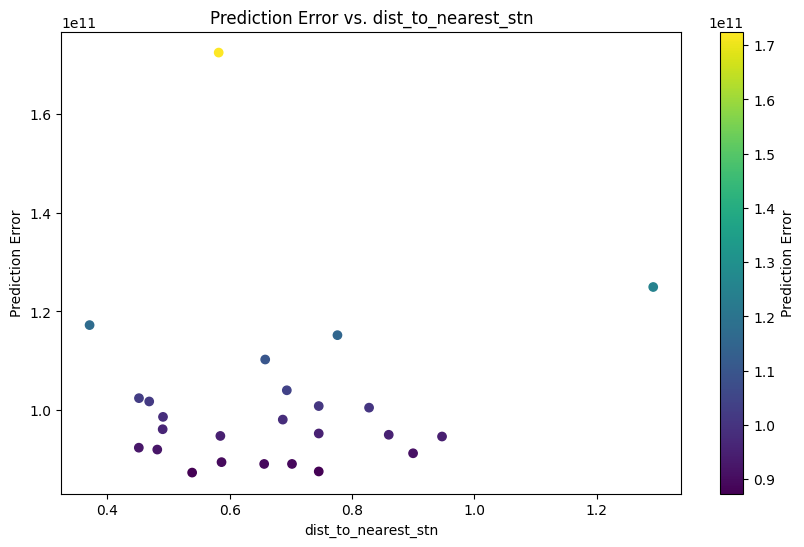

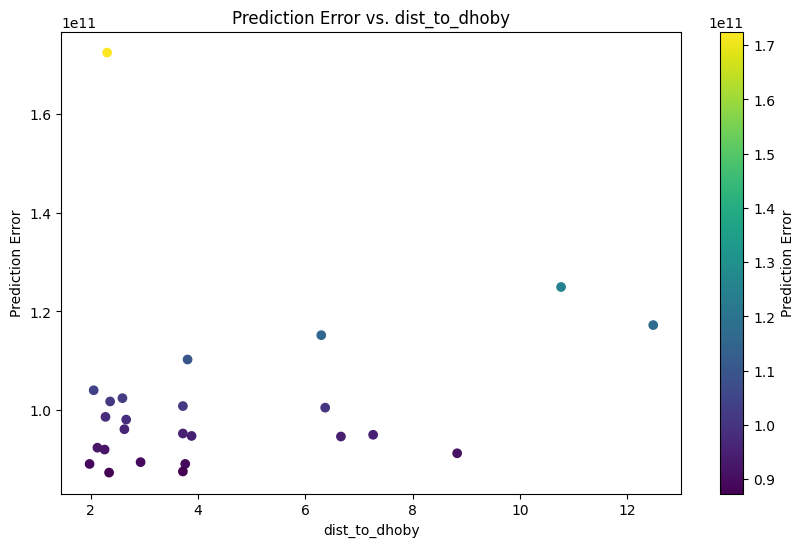

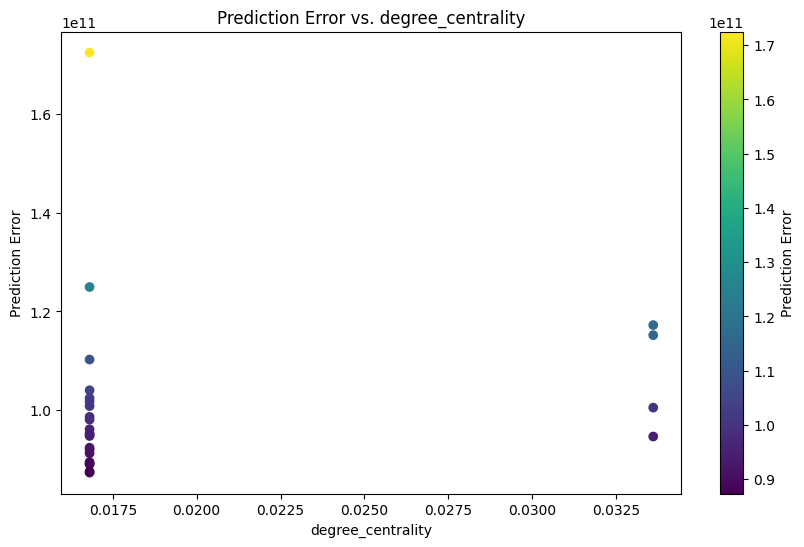

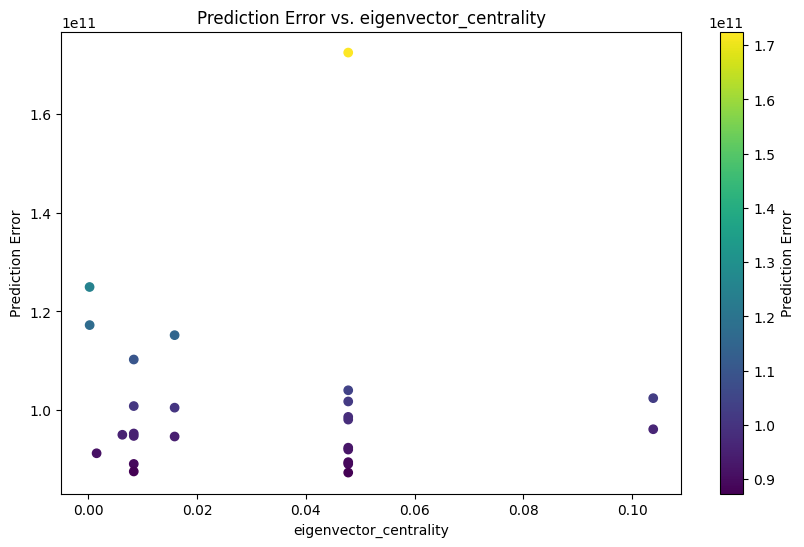

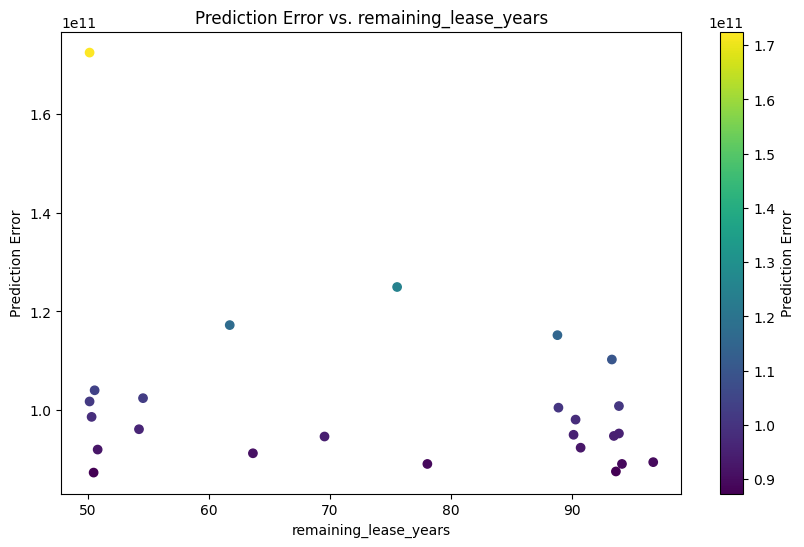

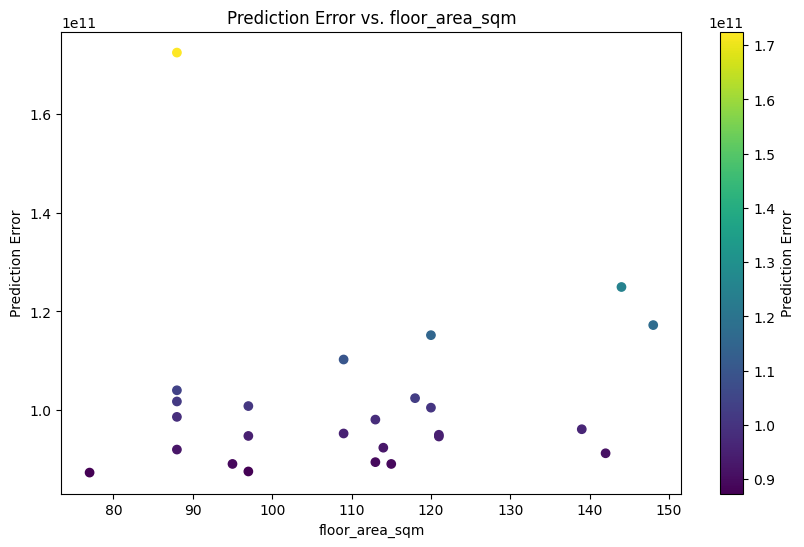

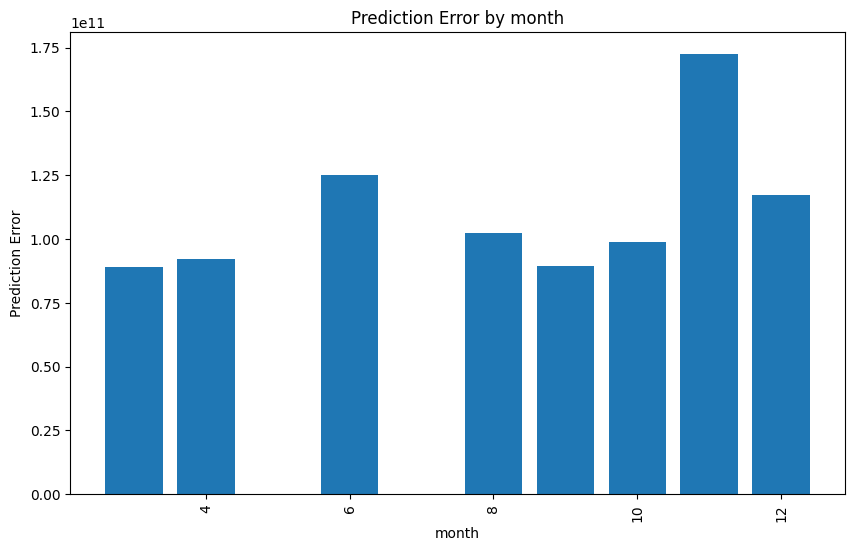

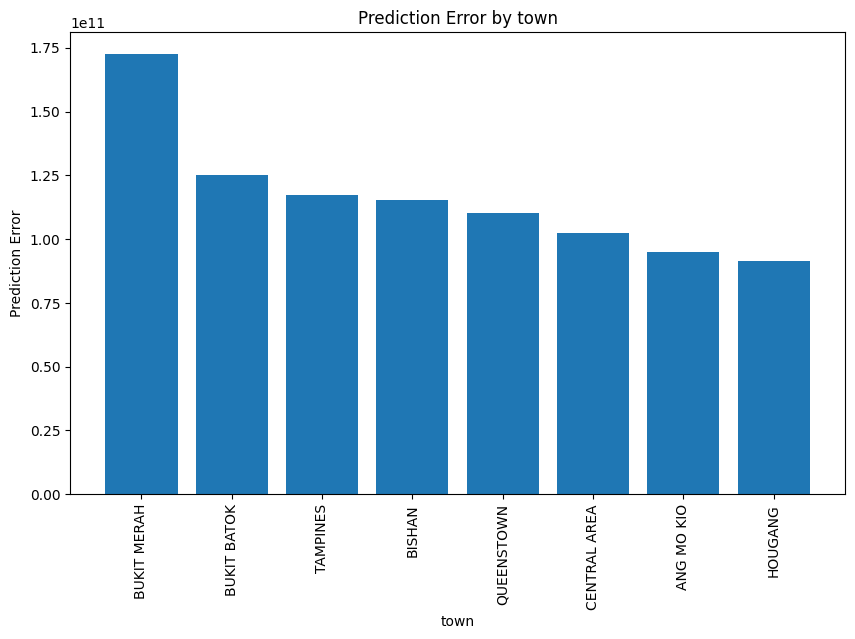

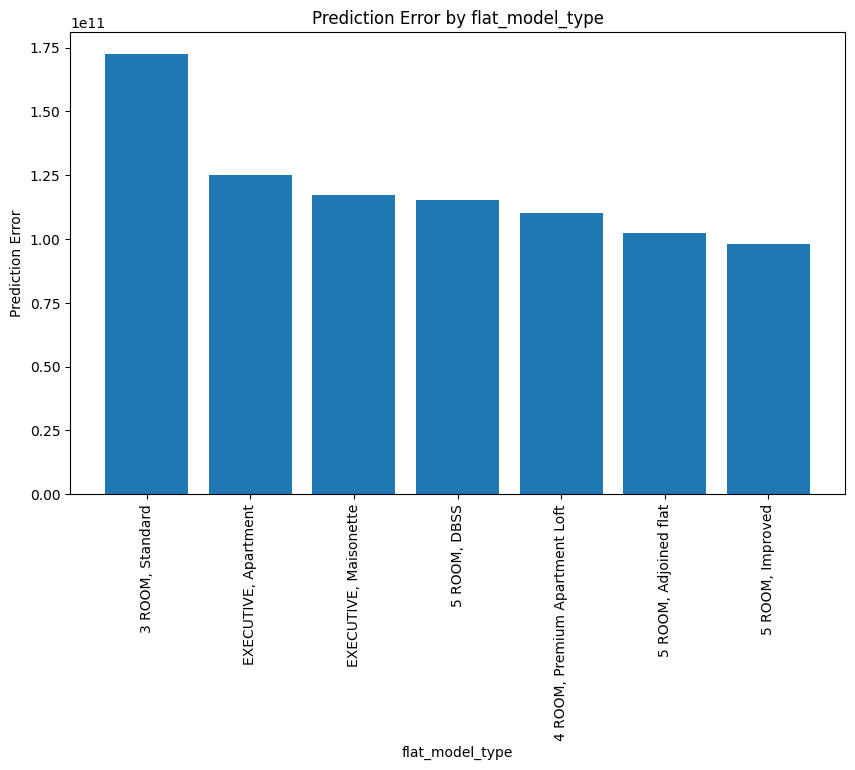

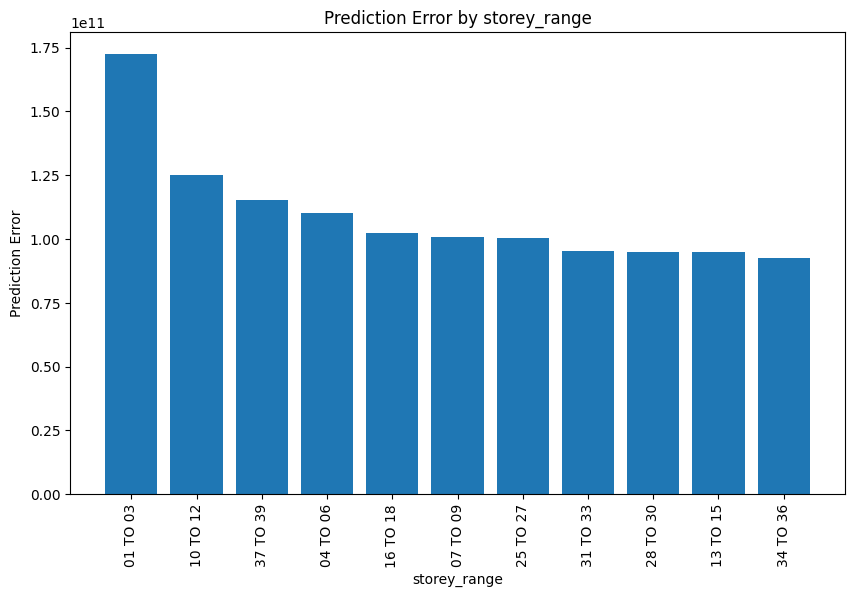

In [7]:
import matplotlib.pyplot as plt

# Error vs. Numeric / Continuous Features
for feature in continuous_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(worst_predictions[feature], worst_predictions["error"], c=worst_predictions["error"])
    plt.xlabel(feature)
    plt.ylabel("Prediction Error")
    plt.title(f"Prediction Error vs. {feature}")
    plt.colorbar(label="Prediction Error")
    plt.show()

# Error vs. Categorical Features
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    plt.bar(worst_predictions[feature], worst_predictions["error"])
    plt.xlabel(feature)
    plt.ylabel("Prediction Error")
    plt.title(f"Prediction Error by {feature}")
    plt.xticks(rotation=90)
    plt.show()

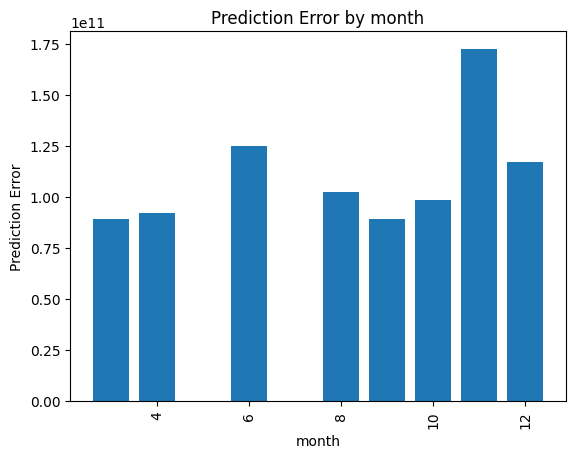

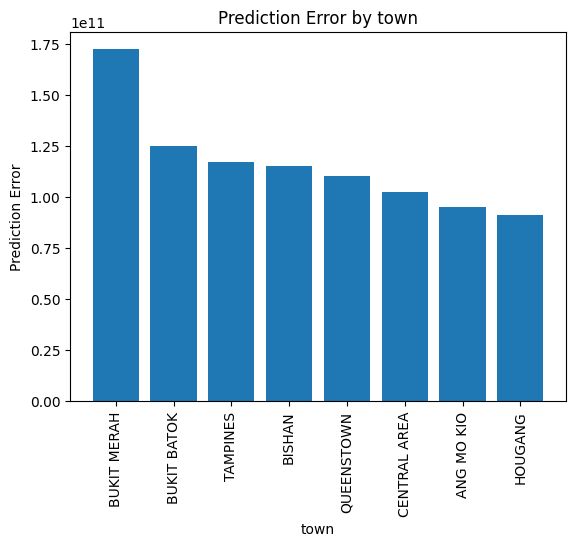

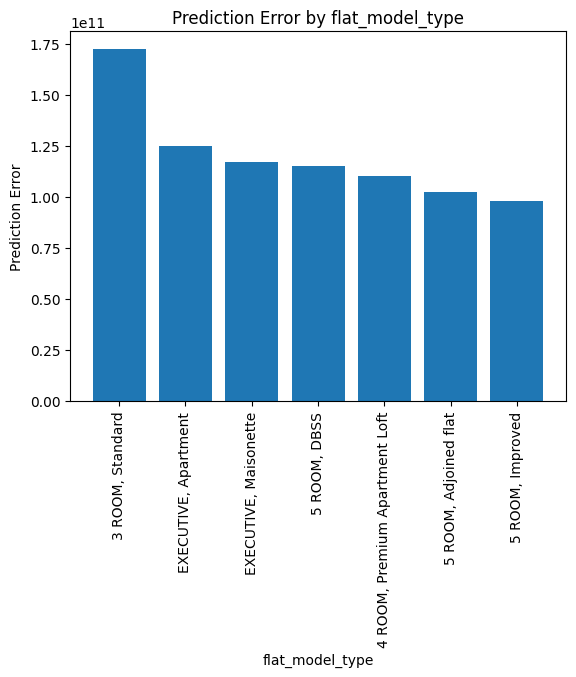

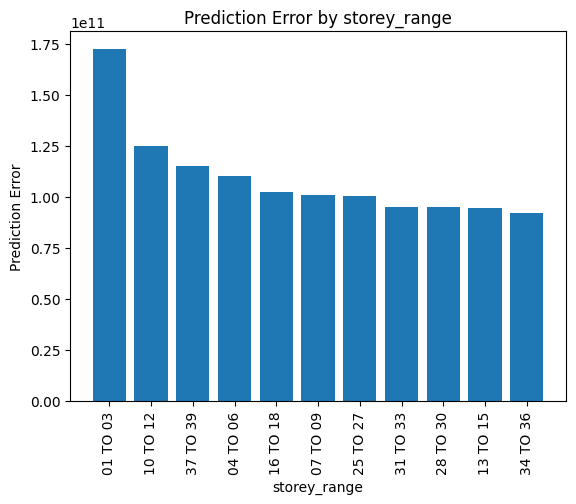

In [8]:
# Error vs. Categorical Features
for feature in categorical_cols:
    plt.bar(worst_predictions[feature], worst_predictions["error"])
    plt.xlabel(feature)
    plt.ylabel("Prediction Error")
    plt.title(f"Prediction Error by {feature}")
    plt.xticks(rotation=90)
    plt.show()


For categorical columns, for example flat_model_type, it can be seen that the 3ROOM, standard has the highest prediction error out of all the classes. For such categorical columns with skewed prediction error to a class, we can consider dropping the column, or train more data to see if it will improve the prediction error skew.

In [9]:
tabular_model.save_model("saved_models/part_b1")